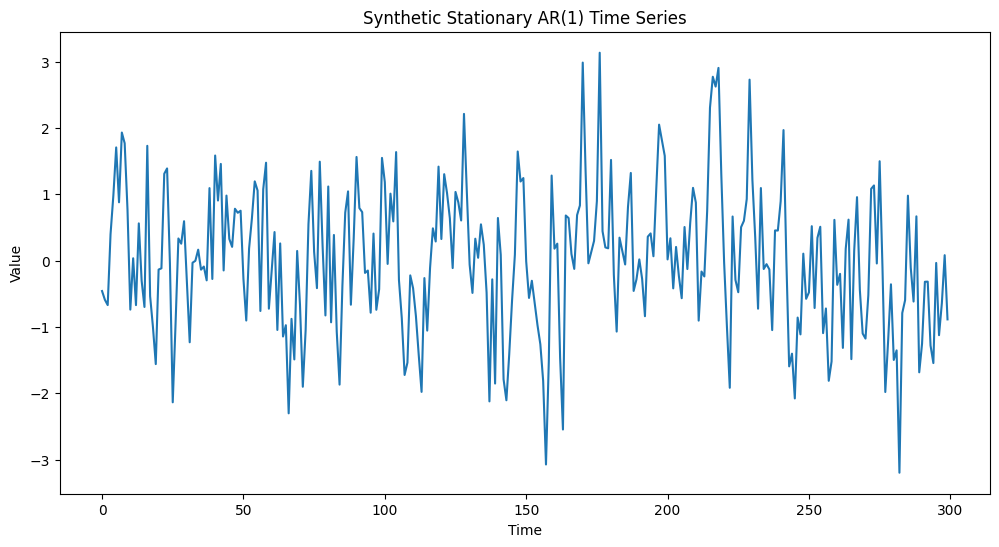

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for AR(1) process: stationary if |phi| < 1
phi = 0.5  # Autoregressive coefficient
sigma = 1.0  # Standard deviation of noise
n_points = 10000  # Number of data points
burn_in = 500  # Burn-in period to ensure stationarity

# Generate the AR(1) series with burn-in
np.random.seed(69)  # For reproducibility
epsilon = np.random.normal(0, sigma, n_points + burn_in)
x = np.zeros(n_points + burn_in)
for t in range(1, n_points + burn_in):
    x[t] = phi * x[t-1] + epsilon[t]

# Discard burn-in period
x = x[burn_in:]

# Create a DataFrame for the time series
df = pd.DataFrame({'time': np.arange(n_points), 'value': x})

# Save to CSV for use in the project
df.to_parquet('../data/cleaned/ar_stationary_dataset.parquet', index=False)

df = df[0:300]
# Optional: Plot the series to visualize
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['value'])
plt.title('Synthetic Stationary AR(1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [19]:
df

,time,value
0,0,-0.457781
1,1,-0.589357
2,2,-0.669790
3,3,0.398318
4,4,0.983070
...,...,...
295,295,-0.034326
296,296,-1.123713
297,297,-0.641549
298,298,0.082641


In [20]:

from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

def stationarity_analysis(df, dataset_name, column_name = None):
    """
    column_name: specify the column to analyze, default is 'Close'
    Perform ADF and KPSS tests for stationarity analysis
    """
    data = df['Close'] if column_name is None else df[column_name]
    
    data.dropna(inplace=True)  # Drop NaN values for accurate testing
    
    print(f"\n{'='*50}")
    print(f"STATIONARITY ANALYSIS: {dataset_name.upper()}")
    print(f"{'='*50}")
    
    # ADF Test
    print("\n--- AUGMENTED DICKEY-FULLER TEST ---")
    adf_result = adfuller(data, autolag='AIC')
    print(f"ADF Statistic: {adf_result[0]:.6f}")
    print(f"p-value: {adf_result[1]:.6f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value:.6f}")
    
    if adf_result[1] <= 0.05:
        print("ADF Result: STATIONARY (Reject null hypothesis)")
    else:
        print("ADF Result: NON-STATIONARY (Fail to reject null hypothesis)")
    
    # KPSS Test
    print("\n--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---")
    kpss_result = kpss(data, regression='c', nlags='auto')
    print(f"KPSS Statistic: {kpss_result[0]:.6f}")
    print(f"p-value: {kpss_result[1]:.6f}")
    print("Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"\t{key}: {value:.6f}")
    
    if kpss_result[1] <= 0.05:
        print("KPSS Result: NON-STATIONARY (Reject null hypothesis)")
    else:
        print("KPSS Result: STATIONARY (Fail to reject null hypothesis)")
    
    # Combined interpretation
    print("\n--- COMBINED INTERPRETATION ---")
    adf_stationary = adf_result[1] <= 0.05
    kpss_stationary = kpss_result[1] > 0.05
    
    if adf_stationary and kpss_stationary:
        print("CONCLUSION: Series is STATIONARY")
    elif not adf_stationary and not kpss_stationary:
        print("CONCLUSION: Series is NON-STATIONARY")
    else:
        print("CONCLUSION: Results are INCONCLUSIVE - further investigation needed")

stationarity_analysis(df=df, dataset_name="Value", column_name='value')


STATIONARITY ANALYSIS: VALUE

--- AUGMENTED DICKEY-FULLER TEST ---
ADF Statistic: -10.424435
p-value: 0.000000
Critical Values:
	1%: -3.452411
	5%: -2.871255
	10%: -2.571947
ADF Result: STATIONARY (Reject null hypothesis)

--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---
KPSS Statistic: 0.201770
p-value: 0.100000
Critical Values:
	10%: 0.347000
	5%: 0.463000
	2.5%: 0.574000
	1%: 0.739000
KPSS Result: STATIONARY (Fail to reject null hypothesis)

--- COMBINED INTERPRETATION ---
CONCLUSION: Series is STATIONARY


In [21]:
df

,time,value
0,0,-0.457781
1,1,-0.589357
2,2,-0.669790
3,3,0.398318
4,4,0.983070
...,...,...
295,295,-0.034326
296,296,-1.123713
297,297,-0.641549
298,298,0.082641
